# Module 4 Section 1 Lab 1 - Liniear Regression (Advance)

## Pendahuluan
Kita mulai dengan kekurangan dari *Liniear Regression*.
- Batasan utama *Liniear Regression* adalah asumsi linearitas antara variabel terikat dan variabel bebas. Di dunia nyata, data jarang dapat dipisahkan secara linier. Ini mengasumsikan bahwa ada hubungan garis lurus antara variabel dependen dan independen yang salah berkali-kali.
- Rentan terhadap *noise* dan *overfitting*: jika jumlah observasi lebih kecil dari jumlah fitur, *Liniear Regression* tidak boleh digunakan. Jika tidak, dapat menyebabkan *overfitting* karena mulai mempertimbangkan *noise* dalam skenario saat membangun model.
- Rawan *outlier*: *Liniear Regression* sangat sensitif terhadap *outlier* (anomali). Jadi, *outlier* harus dianalisis dan dihilangkan sebelum menerapkan *Liniear Regression* ke dataset.
- Rawan multikolinearitas: Sebelum menerapkan *Liniear Regression*, multikolinearitas harus dihilangkan (menggunakan teknik reduksi dimensionalitas) karena diasumsikan tidak ada hubungan antar variabel bebas.


## Objektif
- Underfitting
- Polynomial Regression
- Overfitting
- Konsep Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Underfitting
Underfitting adalah ketika model gagal menangkap keseluruhan tren atau pola data. Misalnya: Model linier akan melakukan pekerjaan yang sangat buruk dalam menjelaskan variabel target jika kita memasangkan ke data nonlinier. 

Model yang underfitting dikatakan memiliki bias tinggi.

- Bias adalah perbedaan antara prediksi dan kebenaran menggunakan model yang dilatih oleh algoritma pembelajaran tertentu.
- Kesalahan karena bias adalah karena kita berasumsi bahwa model linier sederhana akan cocok dengan distribusi data non linier.

**Apa yang terjadi disini?**
Sebuah model linier tidak cocok dengan data non-linier. Tapi kemudian dapatkah kurva non-linier melakukan pekerjaan itu?

# Polynomial Regression
Salah satu cara untuk mengatasi underfitting adalah melalui fungsi polinomial. Mari kita lihat penerapan teknik ini.

Jika kita memodelkan hasil sintesis kimia dalam hal suhu di mana sintesis berlangsung, kita mungkin menemukan bahwa hasil meningkat dengan meningkatkan jumlah untuk setiap unit kenaikan suhu. Dalam hal ini, kami dapat mengusulkan model kuadrat dari bentuk:

$$ y = \beta_{0}+\beta_{1}x+\beta_{2}x^2+\varepsilon. $$

Secara umum, kita dapat memodelkan nilai harapan $y$ sebagai polinomial derajat ke-$n$, menghasilkan model *Polynomial Regression* umum:

$$ y = \beta_{0}+\beta_{1}x+\beta_{2}x^2+\cdots +\beta_{n}x^n+\varepsilon. $$

Proyeksi polinomial dibangun ke dalam Scikit-Learn menggunakan `Polynomial Features`.

## Apa itu Transformator Fitur Polinomial?

Ini adalah mengambil tingkat $n-th$ dari variabel kita. Di bawah ini adalah contoh mudah untuk menampilkan fungsinya:
- Katakanlah kita ingin mengambil derajat ke- 1, 2 dan 3 dari angka 2, 3 & 4.
- Secara intuitif kita tahu bahwa untuk 2 derajat ke-1, 2 dan 3 adalah: 2, 4 $(2^2)$ dan 8 $(2^3)$

In [2]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Pada contoh diatas, `3` dalam `PolynomialFeatures(3, include_bias=False)` pada dasarnya adalah nilai derajat polinomial hingga data yang kita inginkan ditransformasikan.

Kita dapat melihat 3 nilai untuk 2,3 dan 4. Misalnya: $4^1$=(4), $4^2$=(16) dan $4^3$=(64)

Sekarang, mari kita gunakan teknik yang sama untuk membuat model polinomial 7 derajat untuk data non-linier yang dihasilkan sebelumnya.

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

'''
#make_pipeline() sama seperti Pipeline() 
digunakan untuk melakukan urutan transformasi yang berbeda pada dataset mentah sebelum menerapkan estimator akhir.
'''

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())  

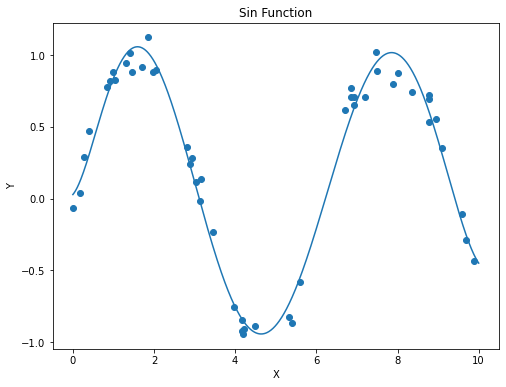

In [5]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(xfit, yfit)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function")

Fungsi basis polinomial orde ke-7 dapat memberikan kecocokan yang sangat baik untuk data non-linier ini.

Ada banyak keuntungan menggunakan *Polynomial Regression*:
- Berbagai fungsi dapat disesuaikan dengan model
- Fungsi polinomial cocok untuk berbagai kelengkungan
- Memberikan pendekatan yang baik dari hubungan dan membuat transformasi lebih dapat ditafsirkan.

# Overfitting
Overfitting terjadi ketika model kita mengikuti tren set data pelatihan dengan sangat ketat yaitu memberikan kesalahan pelatihan yang rendah, tetapi mungkin tidak bekerja dengan baik pada kumpulan data umum atau pengujian yaitu dapat memberikan kesalahan generalisasi yang tinggi pada set data pengujian.

<center><img src="https://vatsalparsaniya.github.io/ML_Knowledge/_images/example.png" width=650><br/></center>

Baca selanjutnya: https://vatsalparsaniya.github.io/ML_Knowledge/Underfitting%20Overfitting/README.html

# Konsep Regularization
Teknik regularisasi digunakan untuk mengurangi kesalahan dengan memasang fungsi secara tepat pada set pelatihan yang diberikan untuk menghindari overfitting. 

Mari kita membangun intuisi dengan bantuan sebuah contoh sederhana:
- Katakanlah orang tua sangat berhati-hati dengan masa depan anak-anaknya. 
- Dia ingin mereka sukses dalam hidup mereka tanpa ada aturan yang ketat. 

Dia mengambil keputusan tentang seberapa banyak fleksibilitas yang harus diberikan kepada anak-anaknya selama mereka dibesarkan:  
- Namun, terlalu banyak pembatasan dapat menekan perkembangan karakter mereka; 
- Sedangkan terlalu banyak fleksibilitas dapat merusak mereka. 
- Dia memutuskan untuk mengatasi situasi ini dengan ide fleksibilitas regularized (pengaturan), yaitu memberikan fleksibilitas yang cukup ditambah dengan beberapa batasan.

Perilaku overfitting terjadi ketika fungsi dasar tumpang tindih:
- Koefisien fungsi basis yang berdekatan bertambah besar dan saling meniadakan.
- Kita perlu membatasi lonjakan tersebut secara eksplisit dalam model dengan menghukum nilai besar dari parameter model. Hukuman seperti itu dikenal sebagai regularisasi.

Regularisasi dapat dilakukan melalui:
- L1 (juga disebut sebagai Lasso Penalization/Regression)
- L2 (juga disebut sebagai Ridge Penalization/Regression)

## L1 Regularization (Lasso)
Melibatkan jumlah nilai absolut (1-norma) dari koefisien regresi. Di sini Penalty $(P)$ pada model adalah:

$$ P=\alpha\sum_{i=1}^{n}\left | \theta_{n} \right | $$

Dan cost function-nya adalah:

$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})^2 + \alpha\sum_{n=1}^{N}\left | \theta_{n} \right | $$

- Di sini kita telah mengenal cost function.
- Dengan menambahkan semua $\theta$ ke cost function yang ingin kita minimalkan, kita dapat menambahkan batasan lebih lanjut pada parameter ini. Perhatikan bagaimana $\theta_{0}$ tidak ada dalam rumus untuk $P$ karena batasannya dimulai dari $i=1$ hingga $i=n$, karena kita tidak menghukum intercept.

### Implementasi L1
Parameter di Lasso mengatur kekuatan penalti dan harus ditentukan melalui cross-validation.

In [6]:
df = pd.read_csv('house_prices_multivariate.csv')
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['SalePrice']

# Membagi data ke dua set dengan 50% di setiap set (set latih dan set uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=0.5)

In [8]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso_model=Lasso(alpha=140, max_iter=100000, random_state=9)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  1495556945.8879895
R2:  0.768928290354447


## L2 Regularization (Ridge)
L2 menghukum jumlah kuadrat (2-norma) dari koefisien model. Di sini Penalty $(P)$ pada model adalah:

$$ P=\alpha\sum_{i=1}^{n}\theta_{n}^{2}  $$

Dan cost function-nya adalah:

$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})^2 + \alpha\sum_{n=1}^{N} \theta_{n}^{2} $$

- Regularisasi L2 akan memaksa parameter menjadi relatif kecil, semakin besar penalti, semakin kecil (dan semakin kuat untuk overfitting) koefisiennya.
- Di sini kita mempertimbangkan setiap fitur tetapi kita menghukum koefisien berdasarkan seberapa signifikan fitur tersebut.

Di sini, $α$ adalah hyper-parameter yang mengontrol kekuatan penalti. Parameter $α$ mengontrol kompleksitas model yang dihasilkan.
- Dalam batas $α→0$, kita memulihkan hasil regresi linier standar.
- Pada limit $α→∞$ , semua respon model akan diredam.

Regularisasi L2 dapat dihitung dengan sangat efisien dengan biaya komputasi yang hampir tidak ada daripada model regresi linier asli.

### Implementasi L2

In [9]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge_model=Ridge(alpha=140, max_iter=100000, random_state=9)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  1530184180.0177402
R2:  0.7635781937147583


## L1 vs L2 Regularization

<center><img src="https://miro.medium.com/max/700/0*tATGj-F5jlQU80GE.png" width=650><br/></center>

Baca selanjutnya: https://towardsdatascience.com/l1-and-l2-regularization-explained-874c3b03f668

# Kesimpulan: Ridge or Lasso?
Katakanlah kita memiliki kumpulan data besar yang memiliki 10.000 fitur. Dan beberapa fitur independen berkorelasi dengan fitur independen lainnya.

Mana yang lebih cocok, Rigde atau Lasso?
- Jika kita menerapkan **Ridge (L2)**, semua fitur akan dipertahankan tetapi **menyusutkan koefisien**. Namun masalahnya adalah model itu akan tetap kompleks karena ada 10.000 fitur, sehingga dapat menyebabkan kinerja model yang buruk.
- Jika kita menerapkan **Lasso (L1)**, masalah utamanya adalah ketika kita memiliki variabel yang berkorelasi, itu akan mempertahankan hanya satu variabel dan menetapkan variabel lain yang berkorelasi ke nol. Itu mungkin akan menyebabkan hilangnya beberapa informasi yang mengakibatkan akurasi yang lebih rendah pada model kita.